### Problem Statement
#### Context- 
A superstore is planning for the year-end sale. They want to launch a new offer - gold membership, that gives a 20% discount on all purchases, for only $499 which is $999 on other days. It will be valid only for existing customers and the campaign through phone calls is currently being planned for them. The management feels that the best way to reduce the cost of the campaign is to make a predictive model which will classify customers who might purchase the offer.

#### Objective - 
The superstore wants to predict the likelihood of the customer giving a positive response and wants to identify the different factors which affect the customer's response. You need to analyze the data provided to identify these factors and then build a prediction model to predict the probability of a customer will give a positive response

About this file
This data was gathered during last year's campaign.
Data description is as follows;

Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
ID - Unique ID of each customer
Year_Birth - Age of the customer
Complain - 1 if the customer complained in the last 2 years
Dt_Customer - date of customer's enrollment with the company
Education - customer's level of education
Marital - customer's marital status
Kidhome - number of small children in customer's household
Teenhome - number of teenagers in customer's household
Income - customer's yearly household income
MntFishProducts - the amount spent on fish products in the last 2 years
MntMeatProducts - the amount spent on meat products in the last 2 years
MntFruits - the amount spent on fruits products in the last 2 years
MntSweetProducts - amount spent on sweet products in the last 2 years
MntWines - the amount spent on wine products in the last 2 years
MntGoldProds - the amount spent on gold products in the last 2 years
NumDealsPurchases - number of purchases made with discount
NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
NumStorePurchases - number of purchases made directly in stores
NumWebPurchases - number of purchases made through the company's website
NumWebVisitsMonth - number of visits to company's website in the last month
Recency - number of days since the last purchase

In [1]:
#importing libaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)

In [2]:
#importing data
df = pd.read_csv('superstore_data.csv')
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0


### Data processing

In [3]:
#dropping unwanted column
df.drop(columns='Id', inplace=True)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0


In [4]:
#Check the number of unique value from all of the object datatype
df.select_dtypes(include='object').nunique()

Education           5
Marital_Status      8
Dt_Customer       663
dtype: int64

In [5]:
# Extract the last four digits from the 'Dt_Customer' column
df['Dt_Customer'] = df['Dt_Customer'].str[-4:]
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1970,Graduation,Divorced,84835.0,0,0,2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1961,Graduation,Single,57091.0,0,0,2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,1958,Graduation,Married,67267.0,0,1,2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1967,Graduation,Together,32474.0,1,1,2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,1989,Graduation,Single,21474.0,1,0,2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0


In [6]:
#Check the number of unique value from all of the object datatype
df.select_dtypes(include='object').nunique()

Education         5
Marital_Status    8
Dt_Customer       3
dtype: int64

### Exploratory Data Analysis

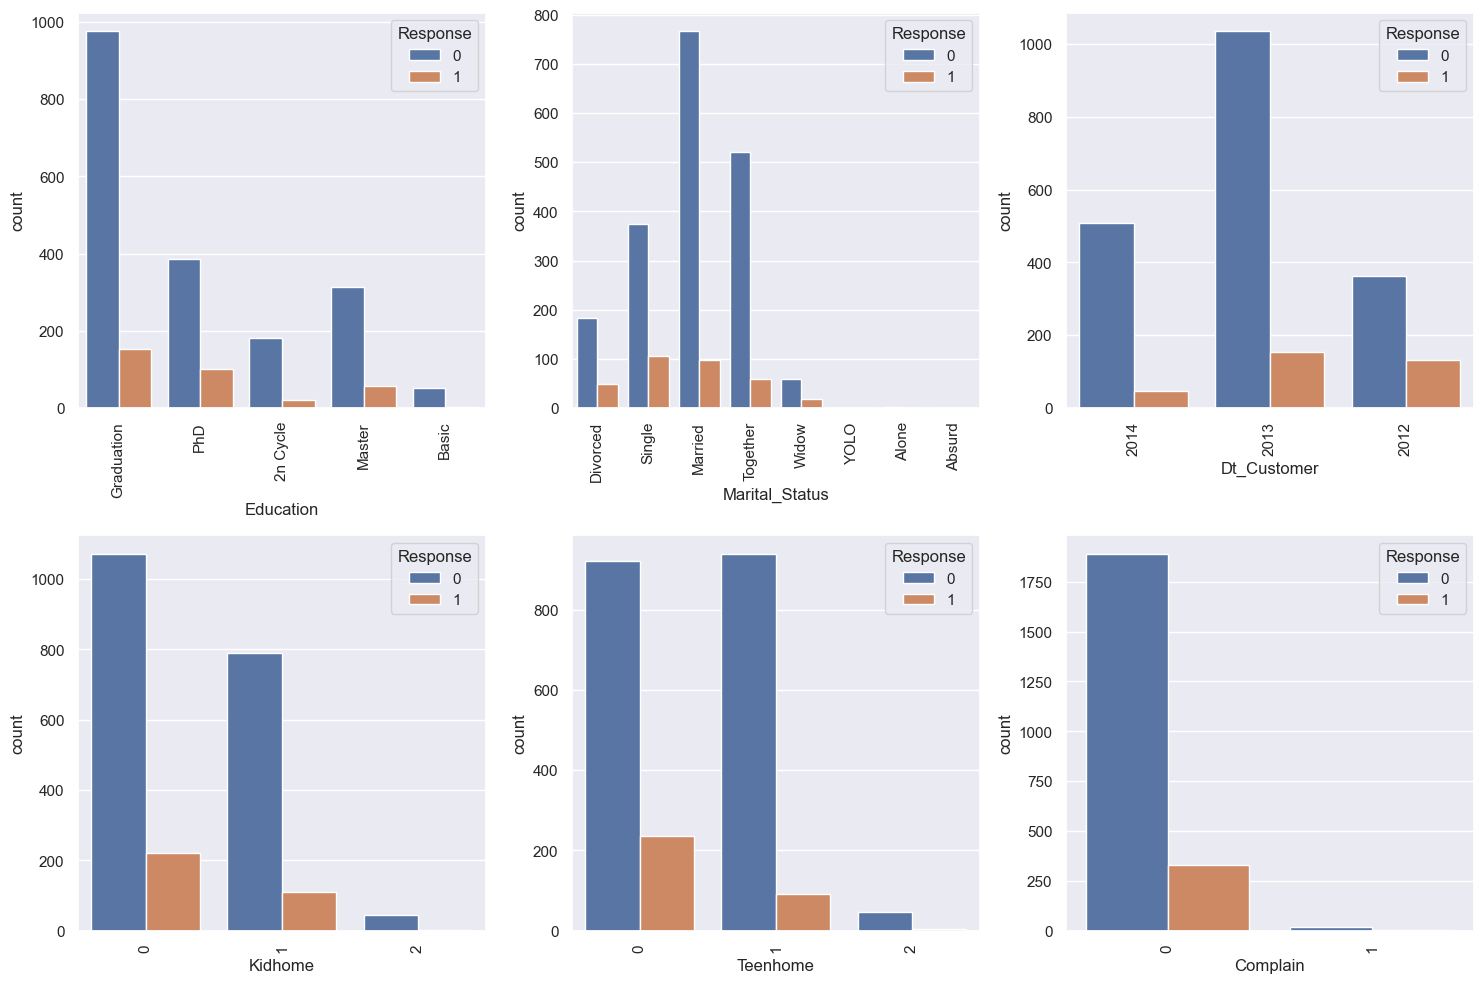

In [7]:
# list of categorical variables to plot
cat_vars = ['Education', 'Marital_Status', 'Dt_Customer', 
            'Kidhome', 'Teenhome', 'Complain']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='Response', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

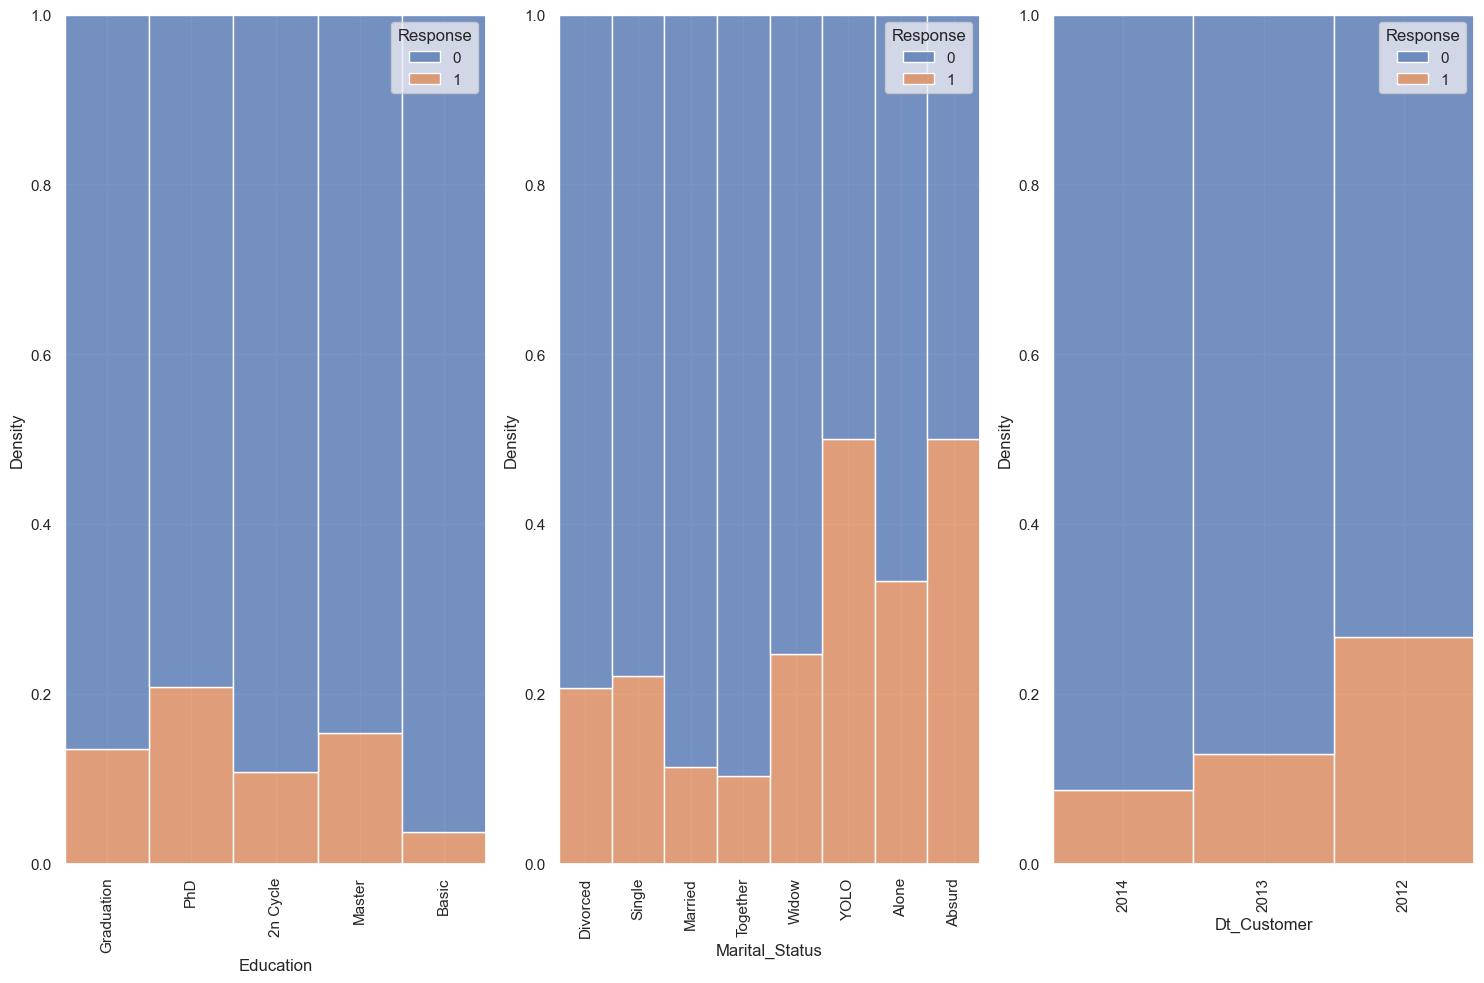

In [8]:
import warnings
warnings.filterwarnings("ignore")
# get list of categorical variables
cat_vars = ['Education', 'Marital_Status', 'Dt_Customer']

# create figure with subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))
axs = axs.flatten()

# create histplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue='Response', data=df, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True, stat='density')
    axs[i].set_xticklabels(df[var].unique(), rotation=90)
    axs[i].set_xlabel(var)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

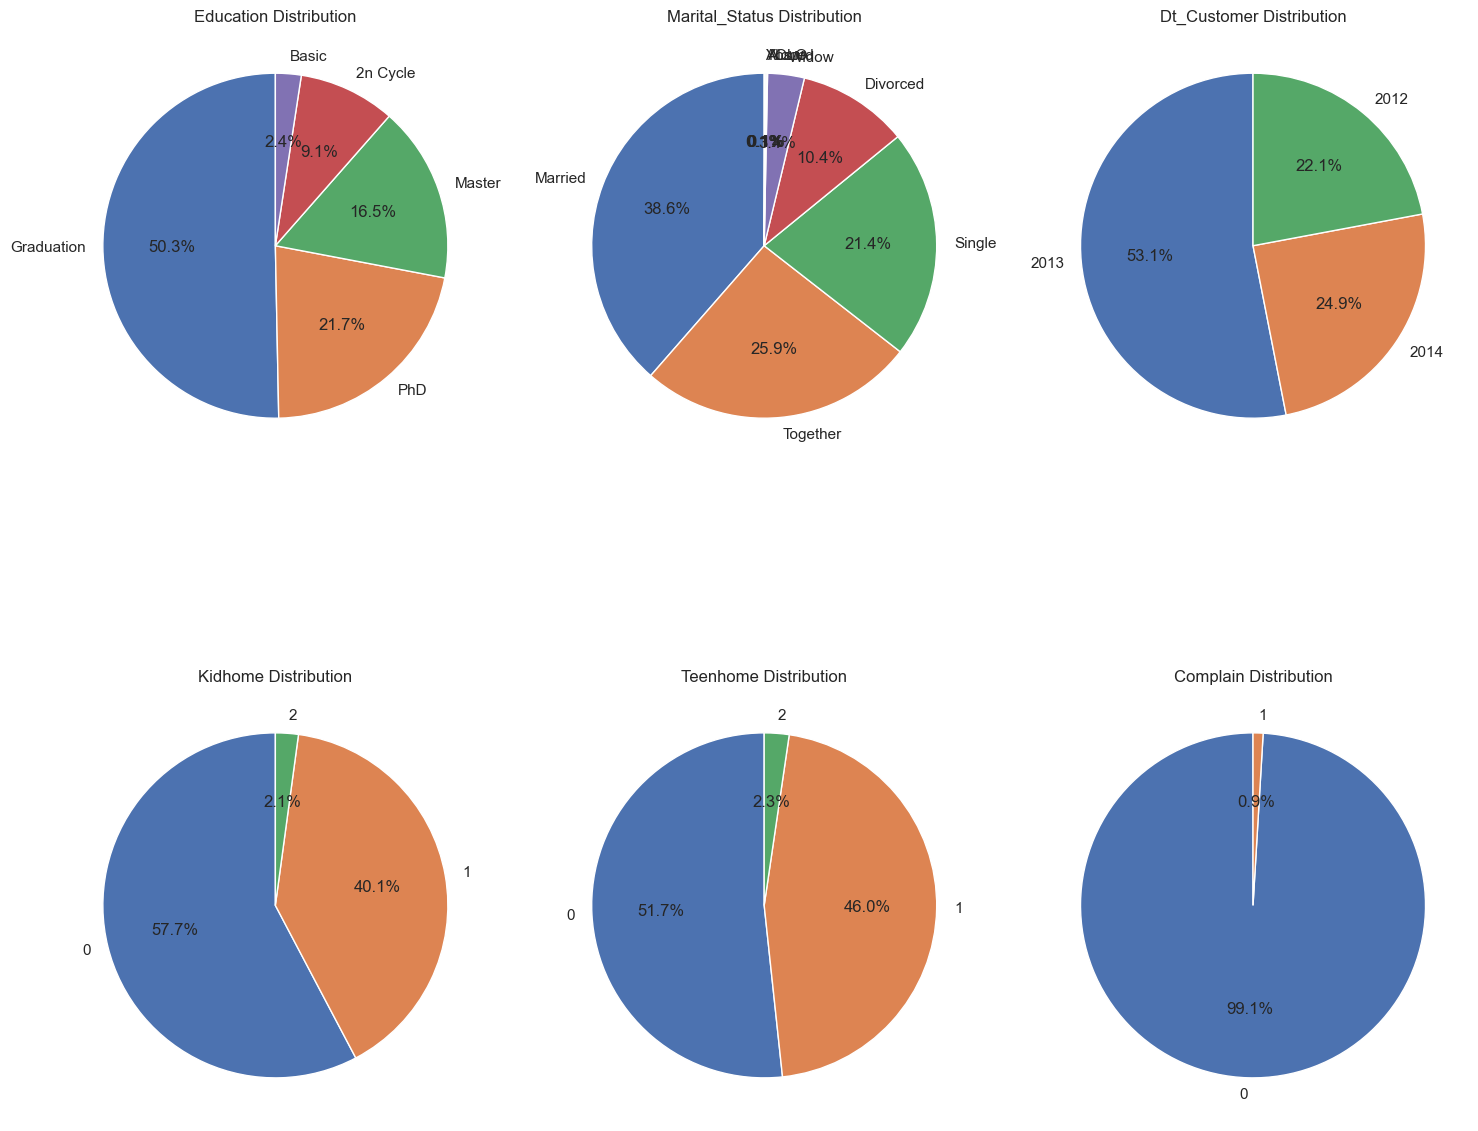

In [9]:
cat_vars = ['Education', 'Marital_Status', 'Dt_Customer', 
            'Kidhome', 'Teenhome', 'Complain']

# create a figure and axes
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))

# create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        # count the number of occurrences for each category
        cat_counts = df[var].value_counts()

        # create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        # set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')

# adjust spacing between subplots
fig.tight_layout()

# show the plot
plt.show()

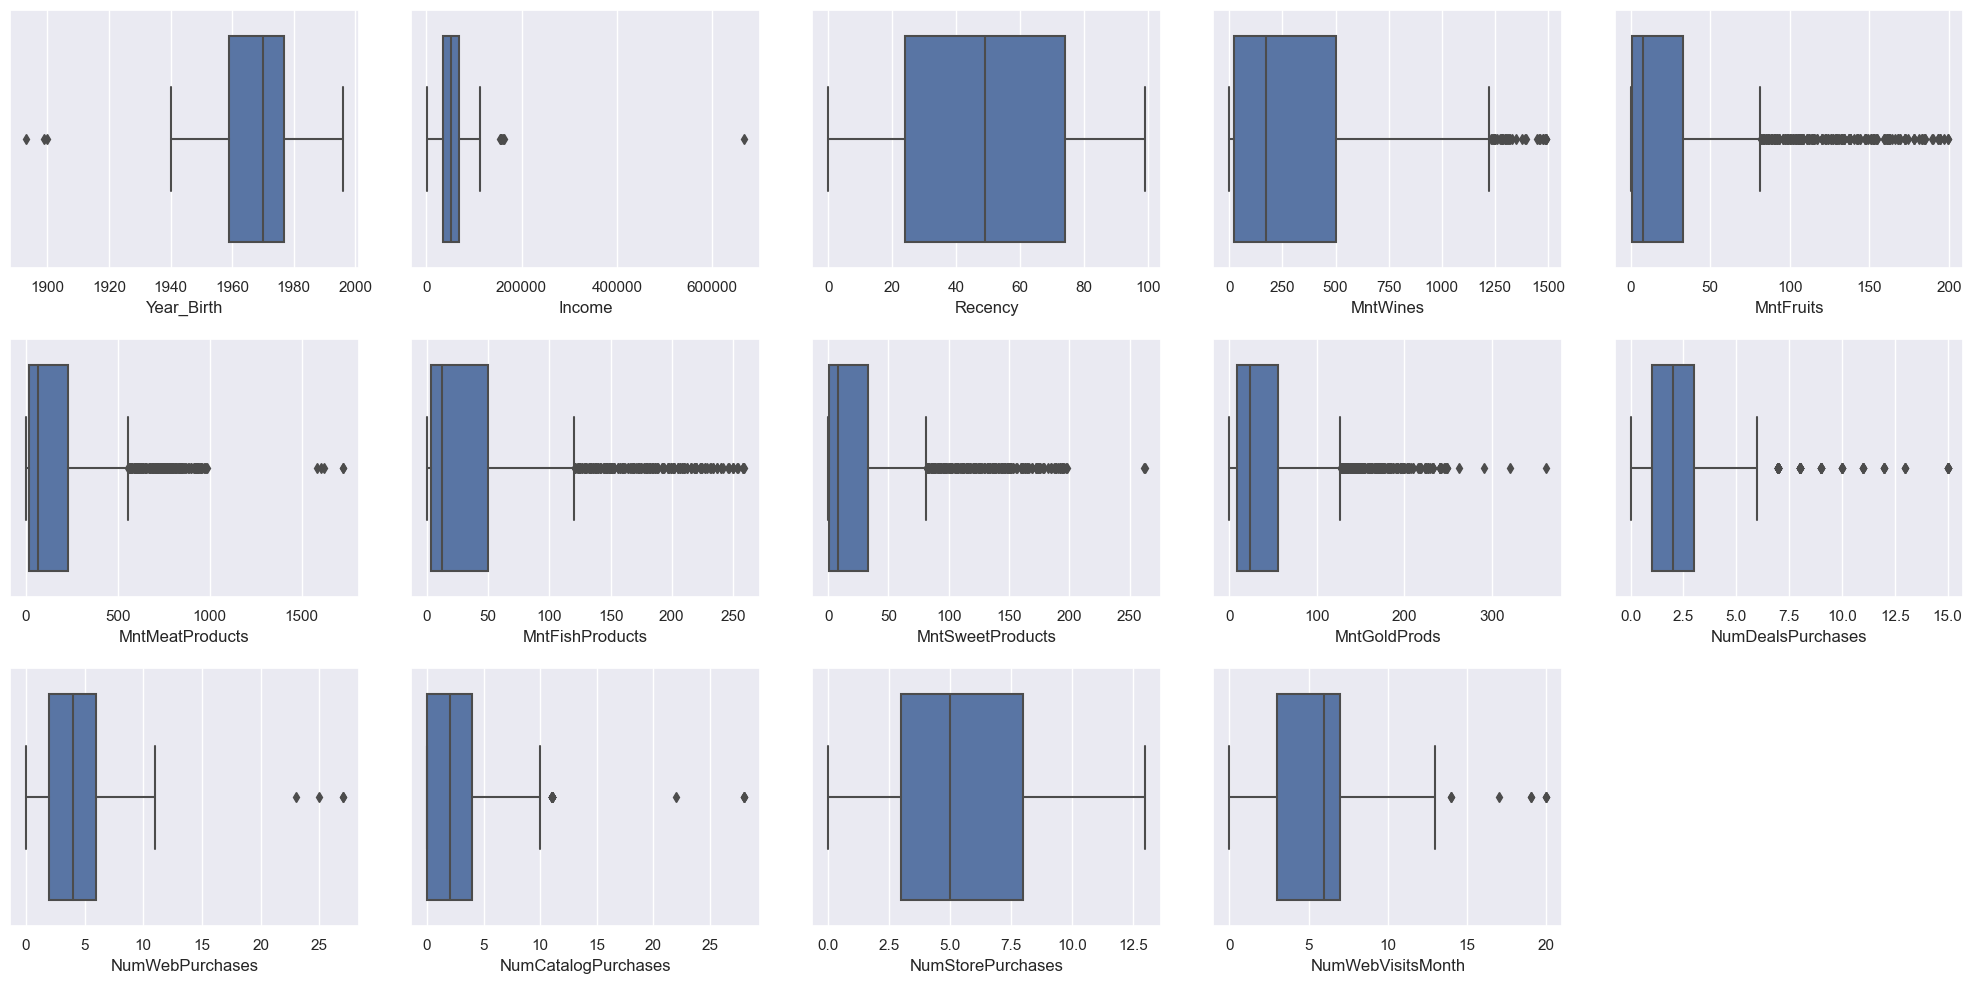

In [10]:
num_vars = ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits',
           'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
           'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
           'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

# remove the 15th subplot
fig.delaxes(axs[14])

plt.show()

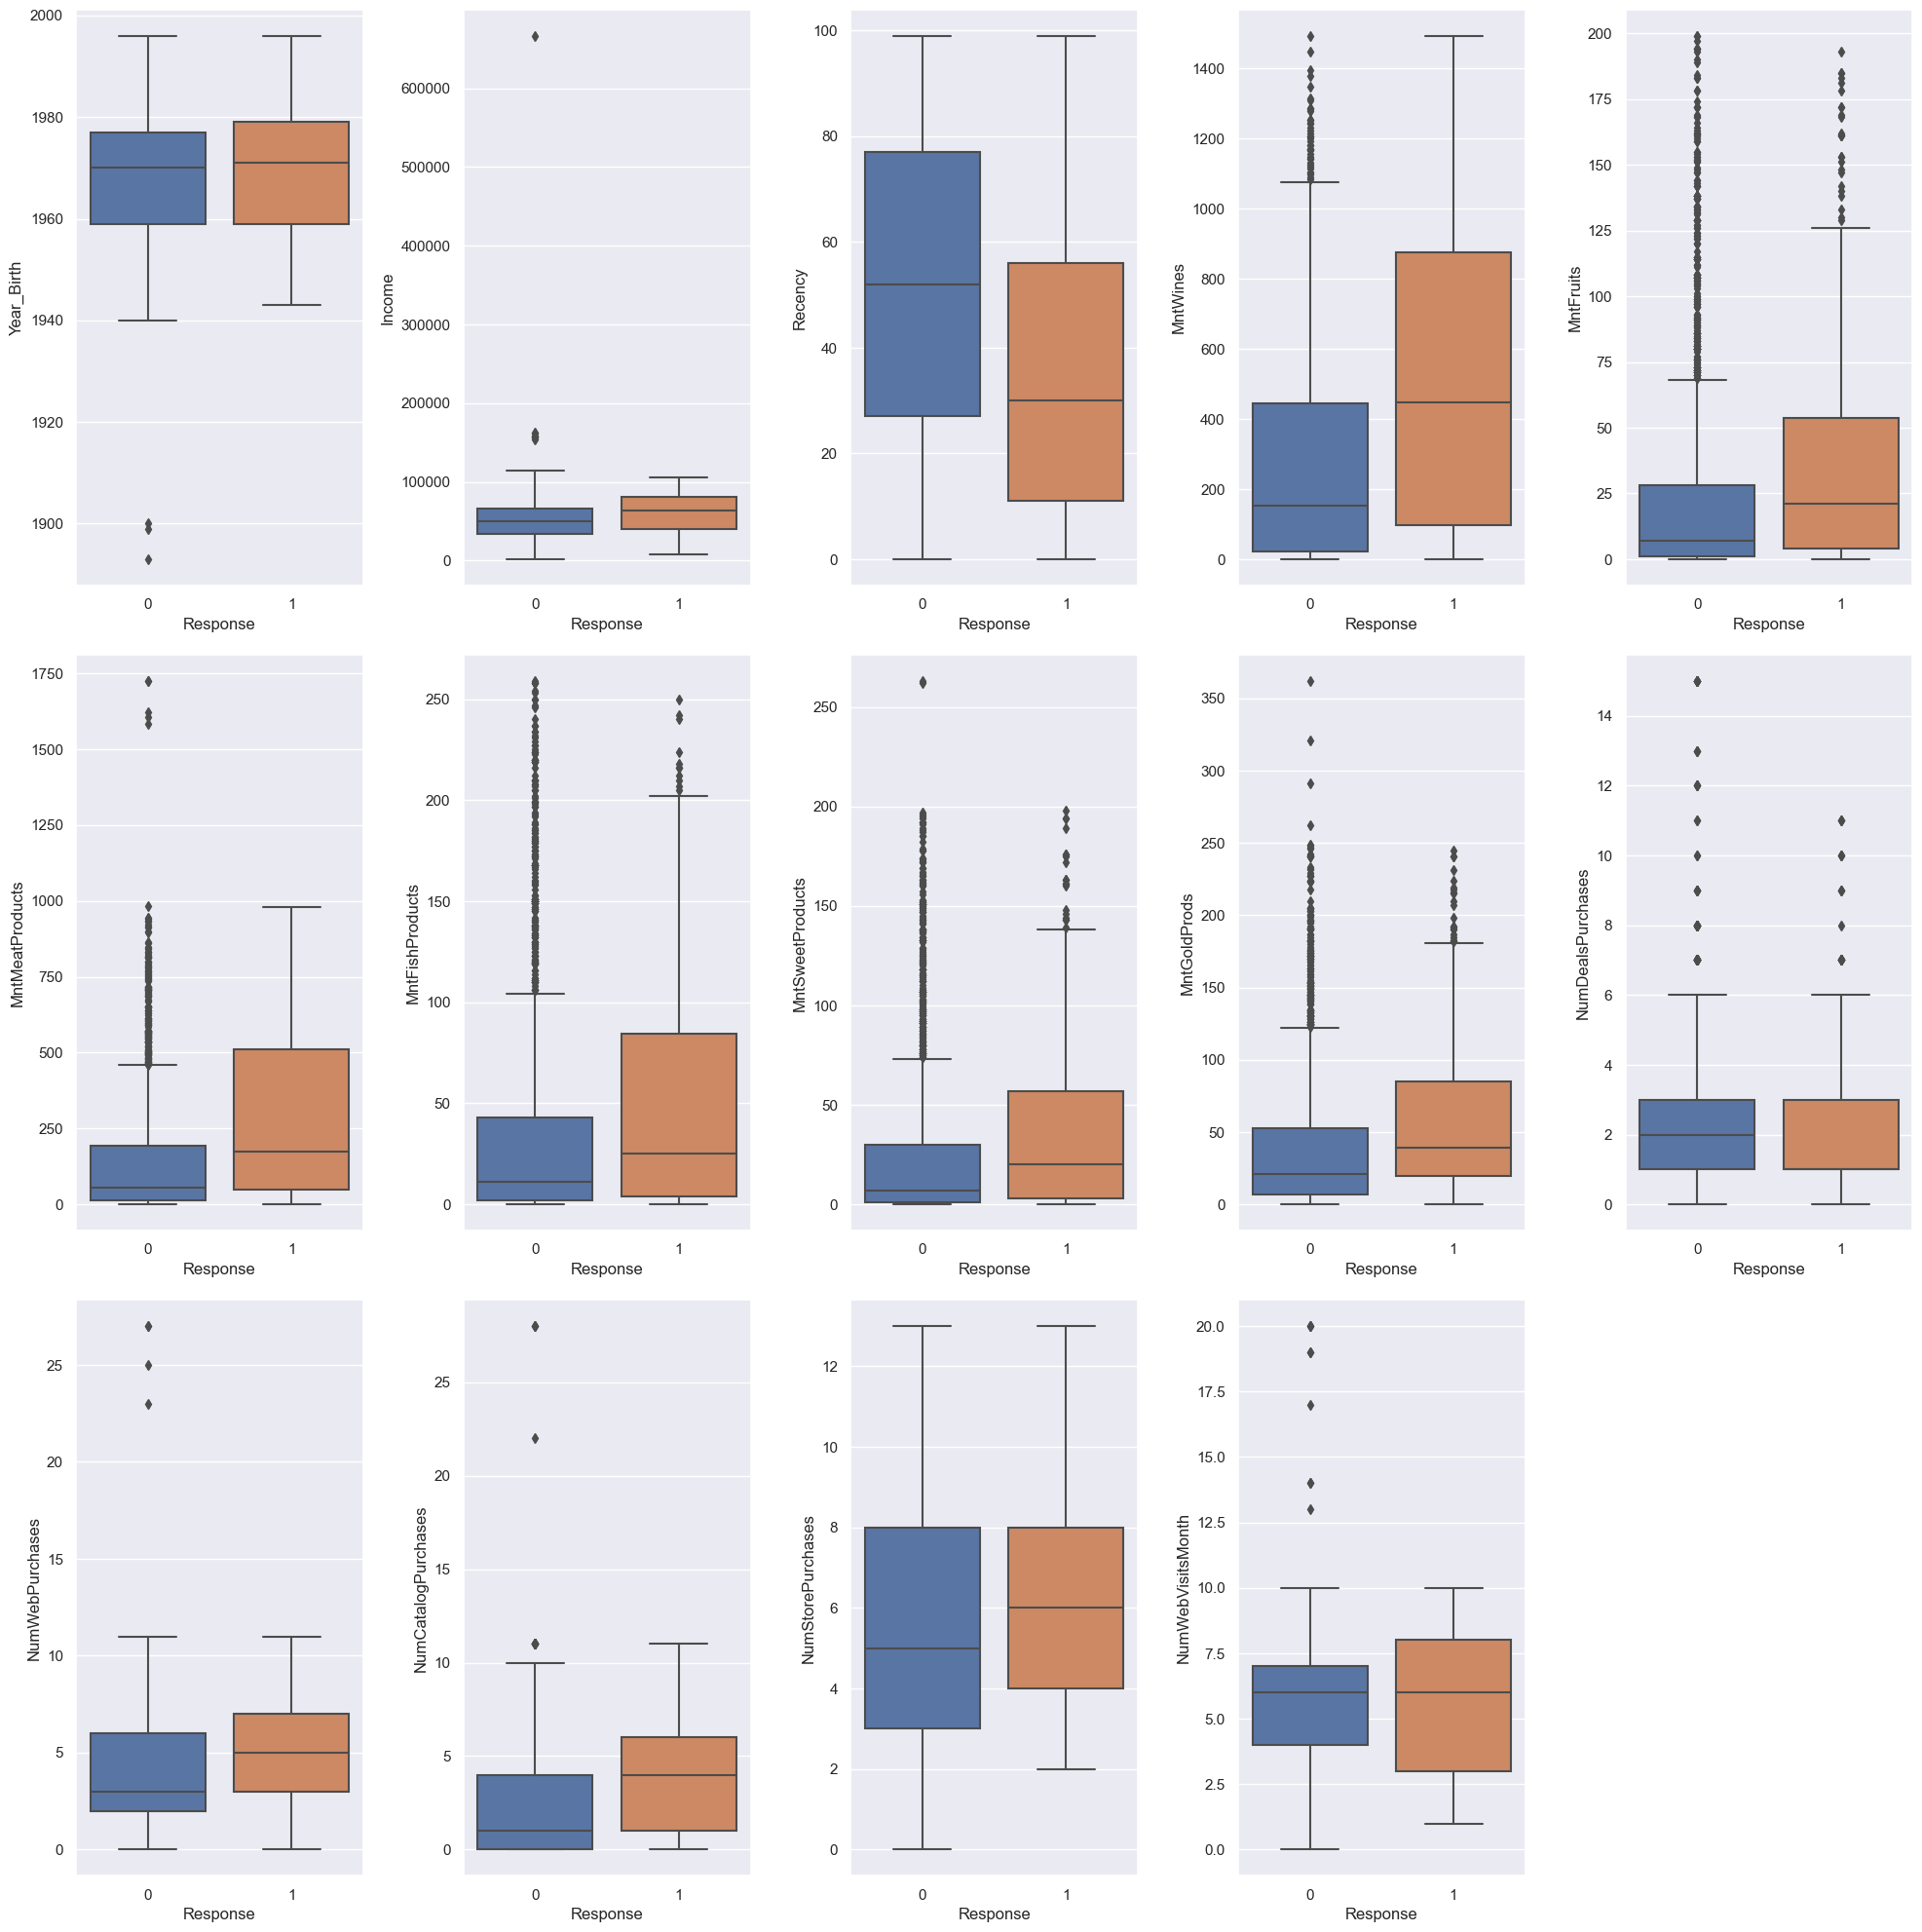

In [11]:
num_vars = ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits',
           'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
           'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
           'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(20, 20))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(y=var, x='Response', data=df, ax=axs[i])

fig.tight_layout()

# remove the 15th subplot
fig.delaxes(axs[14])

plt.show()

#### Violin plot

A violin plot is a type of data visualization that combines aspects of box plots and kernel density plots. It is used to display the distribution and summary statistics of a continuous variable across different categories or groups.

The shape of a violin plot resembles that of a violin or a mirrored density plot. It consists of a series of vertical "violins," with each violin representing a category or group of data. The width of each violin represents the density of data points at different values along the y-axis, while the height of the violin represents the range of values for that category.

Here's a breakdown of the different components of a violin plot:

1. Central line: This line represents the median (50th percentile) of the data for each category. It indicates the center of the distribution.

2. Widest part of the violin: The widest part of the violin corresponds to the region with the highest density of data points. It provides insights into the most common values or the mode of the distribution.

3. Narrower sections of the violin: The width of the violin decreases as you move away from the central line, indicating lower density regions. These sections show less common values or outliers.

4. Dotted lines or notches: Sometimes, violin plots include dotted lines or notches within each violin. These represent the confidence interval or the level of uncertainty in the estimation of the median or other summary statistics.

By observing a violin plot, you can easily compare the distributions of different categories or groups. You can assess characteristics such as skewness, multimodality, and overall spread. Violin plots are especially useful when comparing multiple distributions side by side, as they provide a visual summary of the data's shape and distribution.

Remember that when interpreting a violin plot, it's essential to consider the scale of the y-axis, the range of values, and any additional statistical information provided.

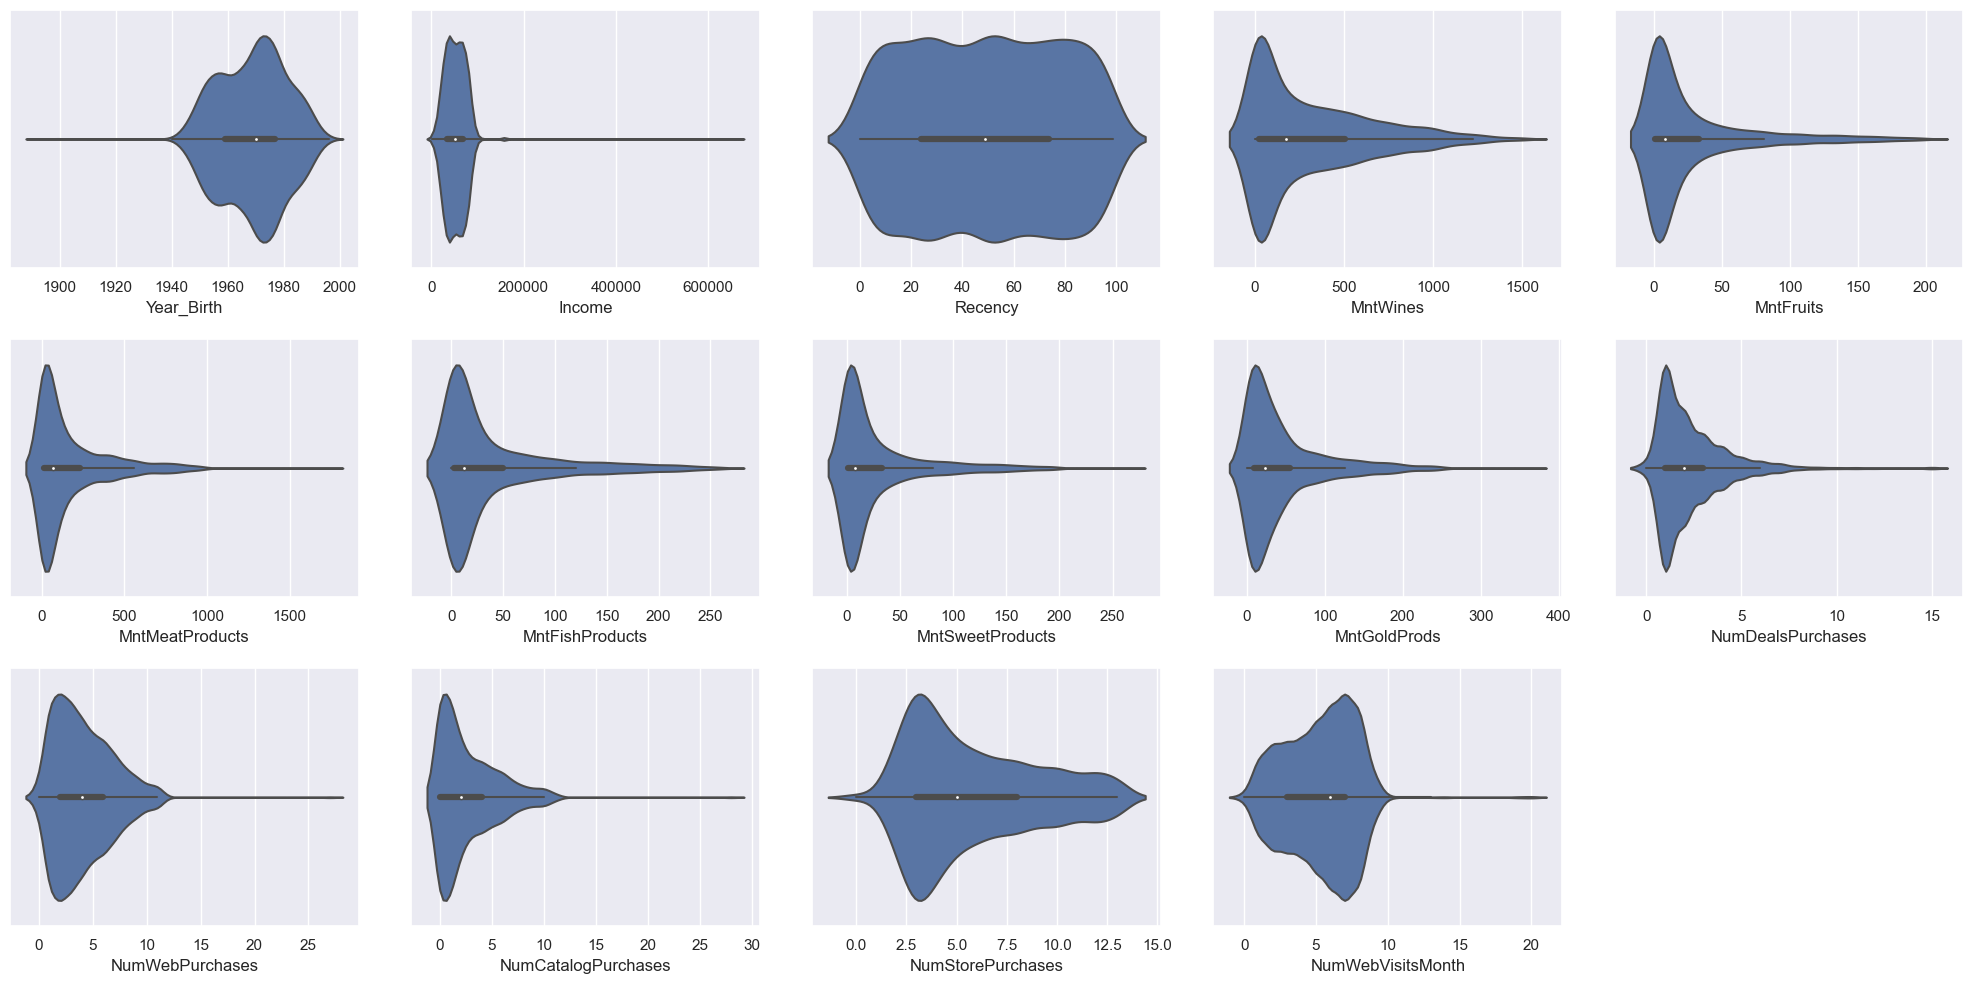

In [12]:
num_vars = ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits',
           'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
           'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
           'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

# remove the 15th subplot
fig.delaxes(axs[14])

plt.show()

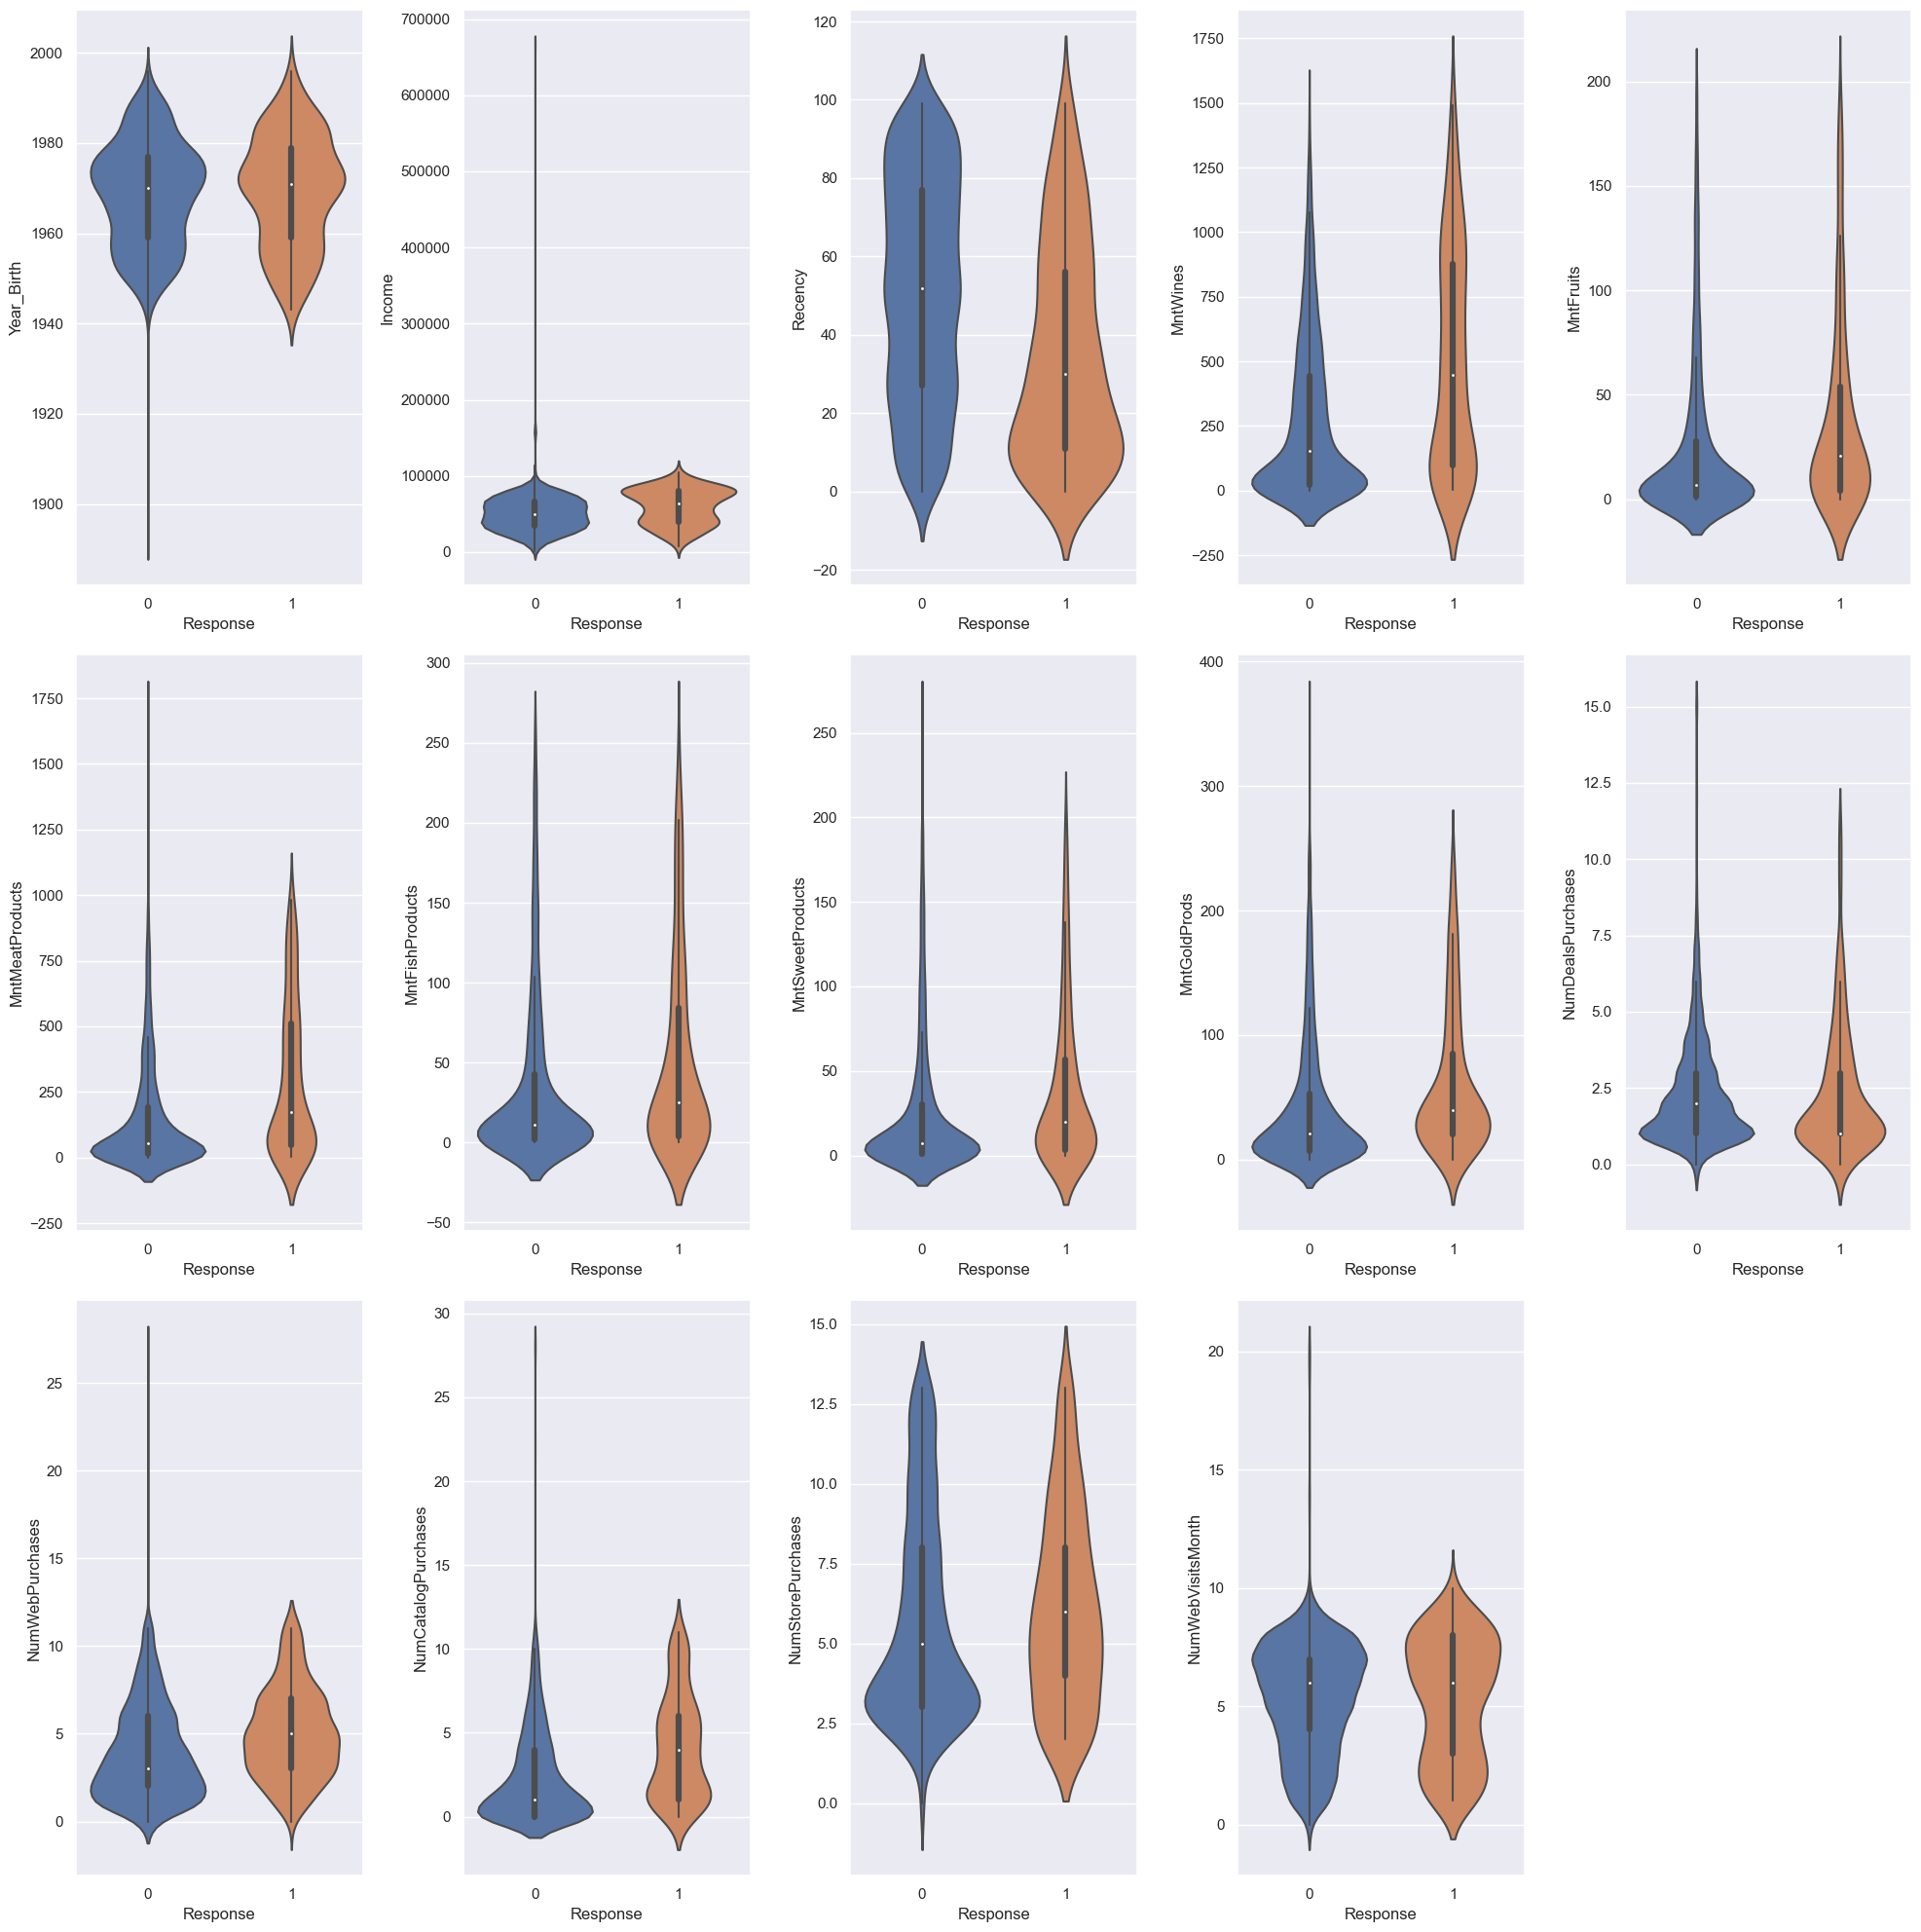

In [13]:
num_vars = ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits',
           'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
           'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
           'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(20, 20))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(y=var, data=df, x='Response', ax=axs[i])

fig.tight_layout()

# remove the 15th subplot
fig.delaxes(axs[14])

plt.show()

#### Data Processing

In [14]:
#Check missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Income    1.071429
dtype: float64

In [15]:
df.shape

(2240, 21)

In [16]:
# Drop null value because its only 1%
df.dropna(inplace=True)
df.shape

(2216, 21)

In [17]:
# Drop Complain column because its very  unbalanced
df.drop(columns='Complain', inplace=True)
df.shape

(2216, 20)

#### Label Encoding for Object Datatype

In [18]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

Education: ['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']
Marital_Status: ['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']
Dt_Customer: ['2014' '2013' '2012']


In [19]:
# Replace 'YOLO' and 'Alone' with 'Single' in the 'Status' column
df['Marital_Status'] = df['Marital_Status'].replace(['YOLO', 'Alone'], 'Single')
df['Marital_Status'] = df['Marital_Status'].replace(['Together'], 'Married')

In [20]:
df.drop(columns='Dt_Customer', inplace=True)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response
0,1970,Graduation,Divorced,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,1
1,1961,Graduation,Single,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,1
2,1958,Graduation,Married,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0
3,1967,Graduation,Married,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0
4,1989,Graduation,Single,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1


In [21]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    
    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

Education: [2 4 0 3 1]
Marital_Status: [1 3 2 4 0]


#### Correlation Heatmap

<Axes: >

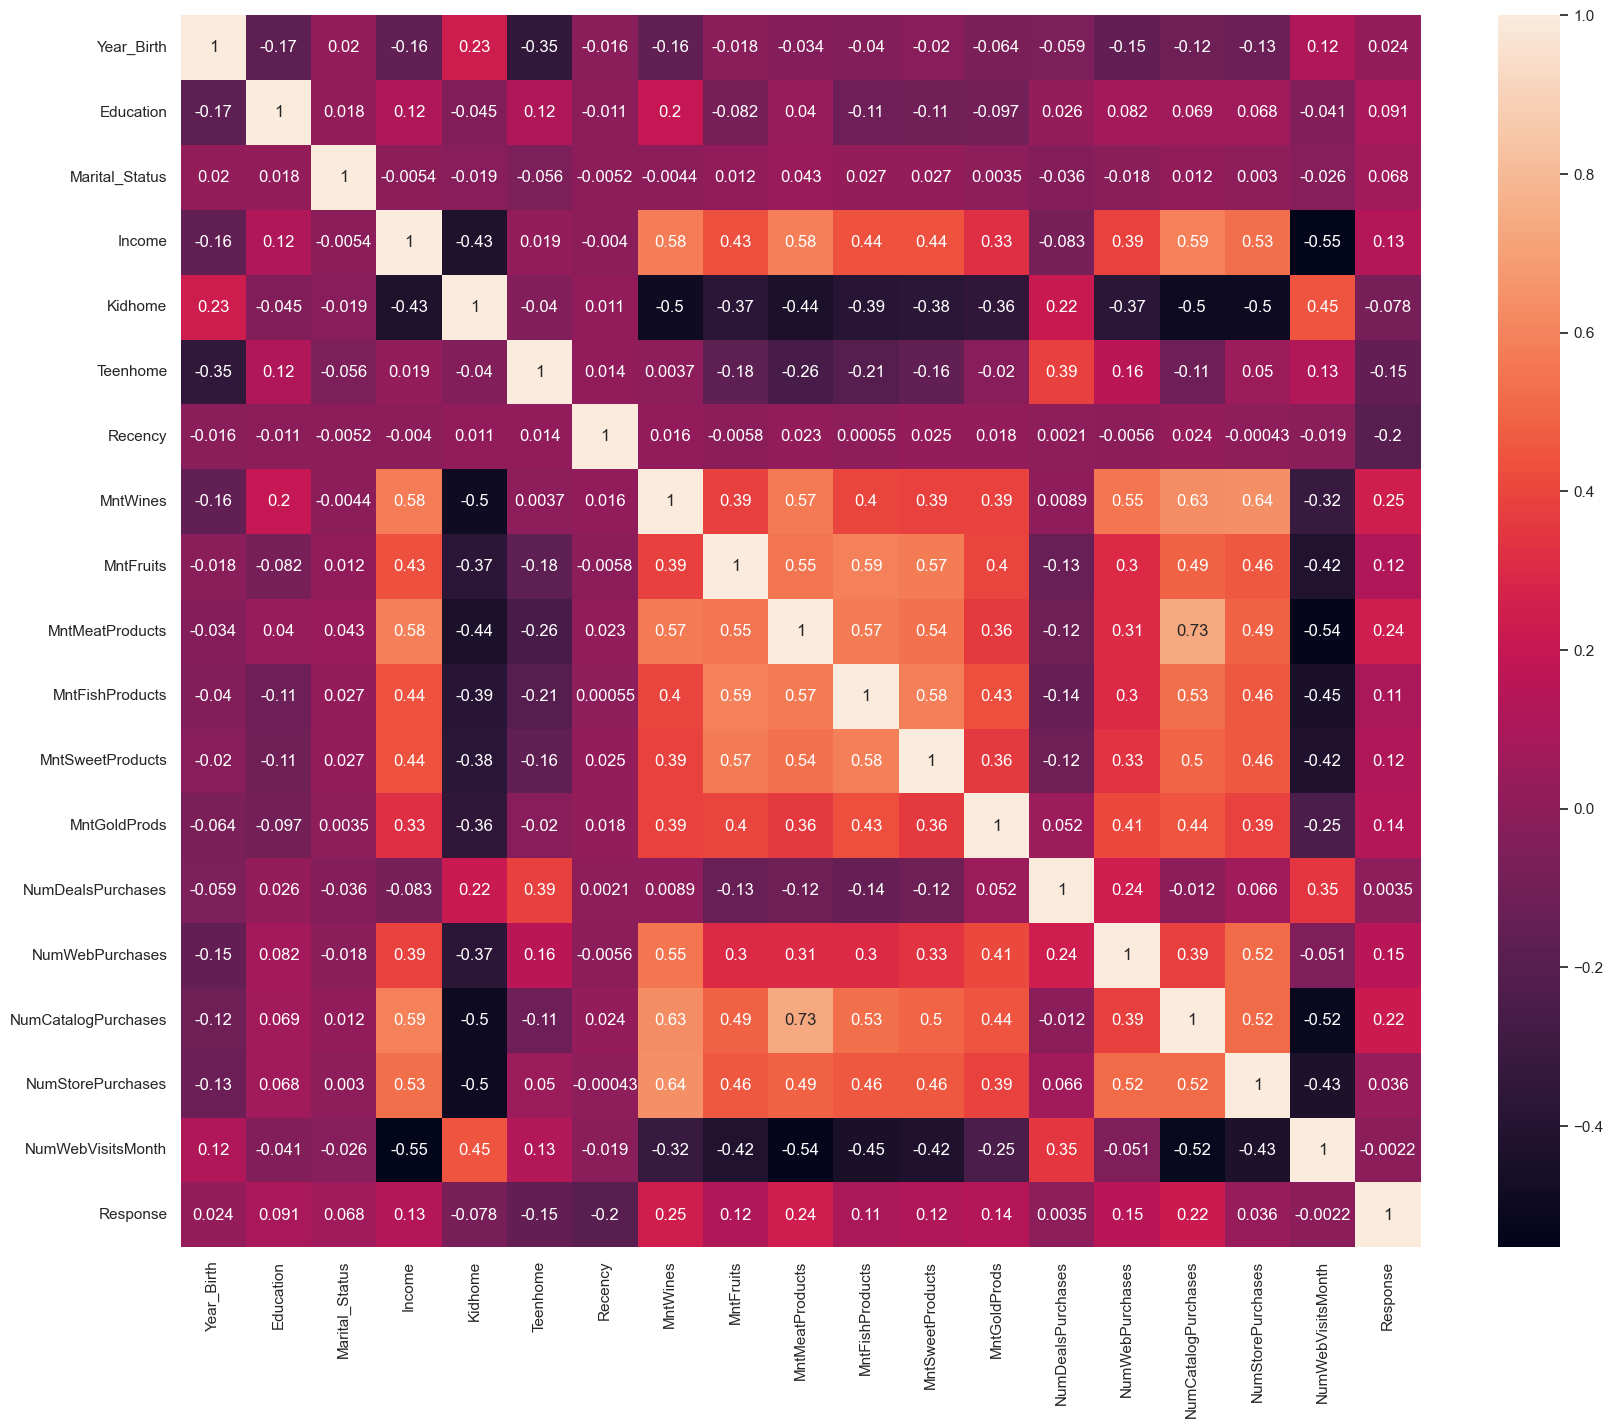

In [22]:
#Correlation Heatmap (print the correlation score each variables)
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

#### Train Test Split

In [23]:
from sklearn.model_selection import train_test_split
# Select the features (X) and the target variable (y)
X = df.drop('Response', axis=1)
y = df['Response']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Remove Outliers from train data using Z-score

In [24]:
from scipy import stats

# Define the columns for which you want to remove outliers
selected_columns = ['Year_Birth', 'Income', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
           'MntGoldProds', 'NumDealsPurchases','NumCatalogPurchases']

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[selected_columns]))

# Set a threshold value for outlier detection (e.g., 3)
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

#### DecisionTree

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 3, 'random_state': 0}


In [26]:
#train the model
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=8, min_samples_leaf=1, min_samples_split=3, class_weight='balanced')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=8,
                       min_samples_split=3, random_state=0)

In [27]:
#test the data
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 77.25 %


In [28]:
#predict the accuracy
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.7725225225225225
Precision Score :  0.7725225225225225
Recall Score :  0.7725225225225225
Jaccard Score :  0.6293577981651376
Log Loss :  8.199119352028902


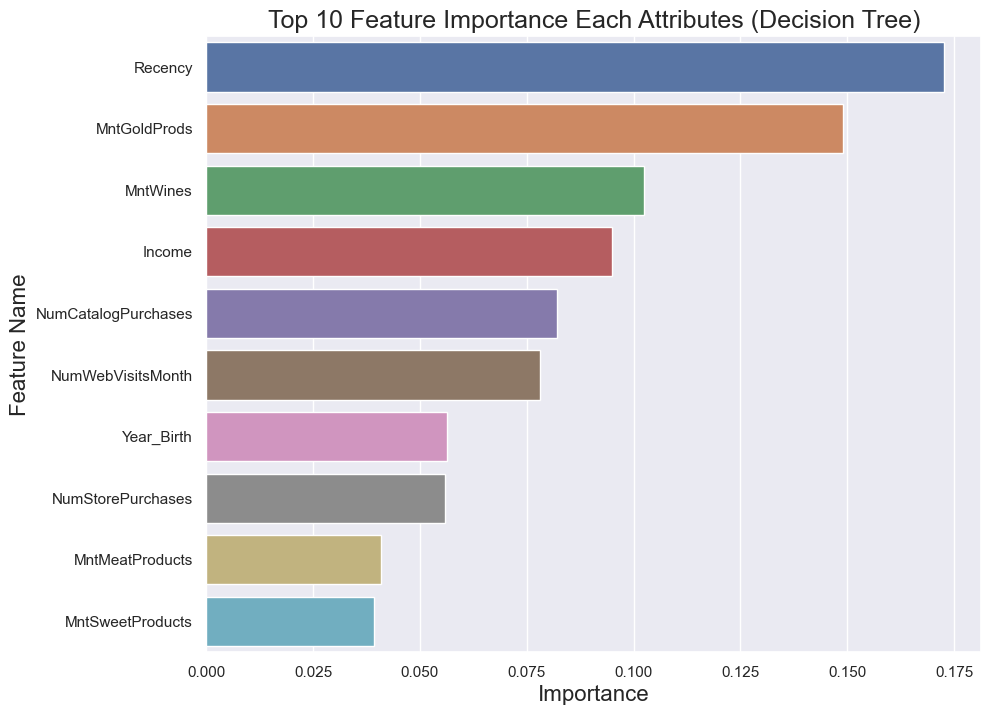

In [29]:
#checking for the top ten most important columns
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [31]:
!pip install shap

     ------------------------------------ 435.6/435.6 kB 486.1 kB/s eta 0:00:00
  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)


The SHAP (SHapley Additive exPlanations) library in Python is a powerful tool for interpreting the outputs of machine learning models. It provides a unified framework to explain the predictions of various models, including tree-based models, linear models, deep learning models, and more.

Here's a brief overview of how you can use the SHAP library in Python:

1. Installation: You can install the SHAP library using pip:
   ```
   pip install shap
   ```

2. Importing the necessary modules: To use SHAP, you need to import the relevant modules:
   ```python
   import shap
   ```

3. Preparing your model: SHAP can be used with various models, depending on the task at hand. You need to train or load your model using a suitable Python library such as scikit-learn, XGBoost, LightGBM, or TensorFlow.

4. Generating explanations: Once you have a trained model, you can generate explanations using SHAP. The main function to generate explanations is `shap.Explainer`. Here's an example of generating SHAP values for a scikit-learn model:
   ```python
   # Assuming you have a trained scikit-learn model named 'model'
   explainer = shap.Explainer(model)
   shap_values = explainer.shap_values(X)
   ```

   In the code snippet above, `X` represents the input data for which you want to generate explanations.

5. Interpreting explanations: After generating SHAP values, you can interpret them using various visualization techniques provided by SHAP. Some popular visualizations include:
   - Summary plot: This plot provides an overview of the impact of different features on the model predictions.
   ```python
   shap.summary_plot(shap_values, X)
   ```
   - Force plot: This plot shows the contribution of each feature to an individual prediction.
   ```python
   shap.force_plot(explainer.expected_value, shap_values[i], X.iloc[i])
   ```

   There are several other visualization methods available in SHAP, such as dependence plots, waterfall plots, and bar plots. You can explore the SHAP documentation for more details on these visualizations.

These are just the basic steps to get started with SHAP. The library provides extensive functionality to explore and interpret the behavior of machine learning models. I recommend referring to the SHAP documentation and examples for more in-depth usage and advanced features.

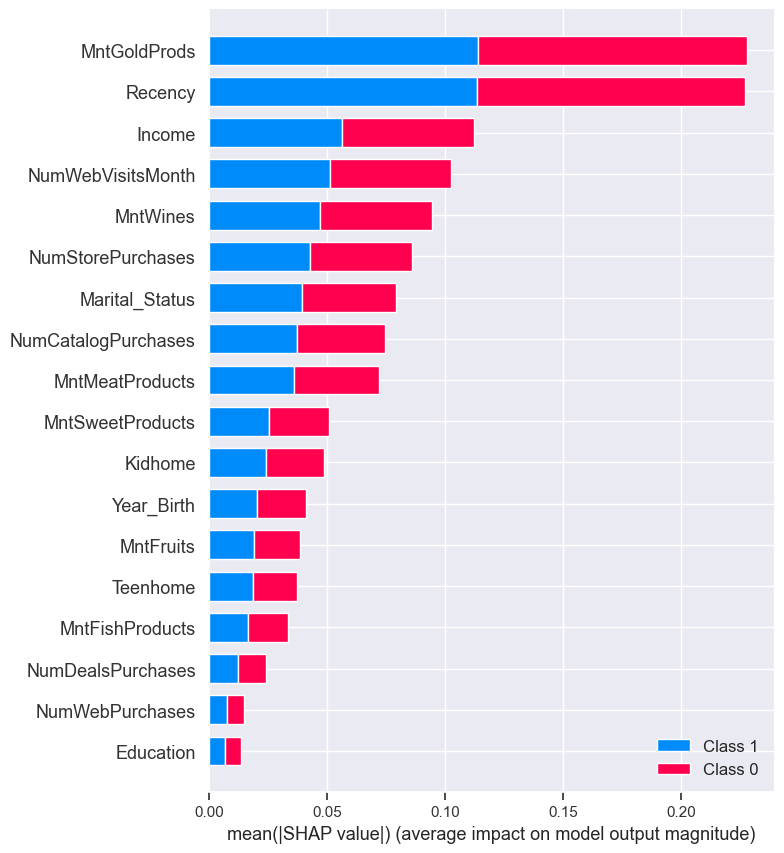

In [32]:
#hierarchy of important column
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

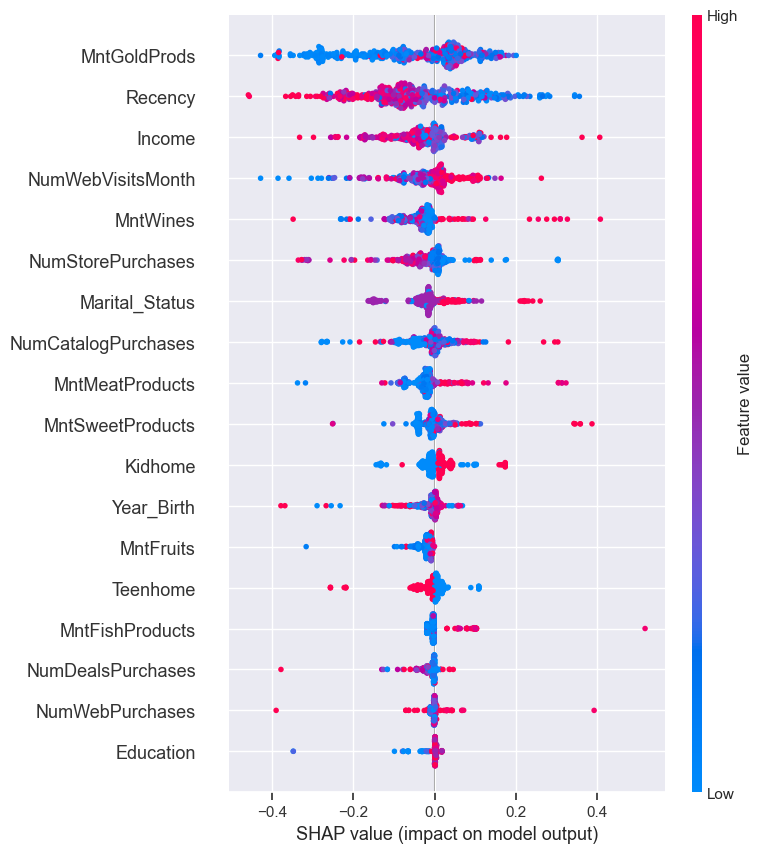

In [33]:
# compute SHAP values, to explain how the model did
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)

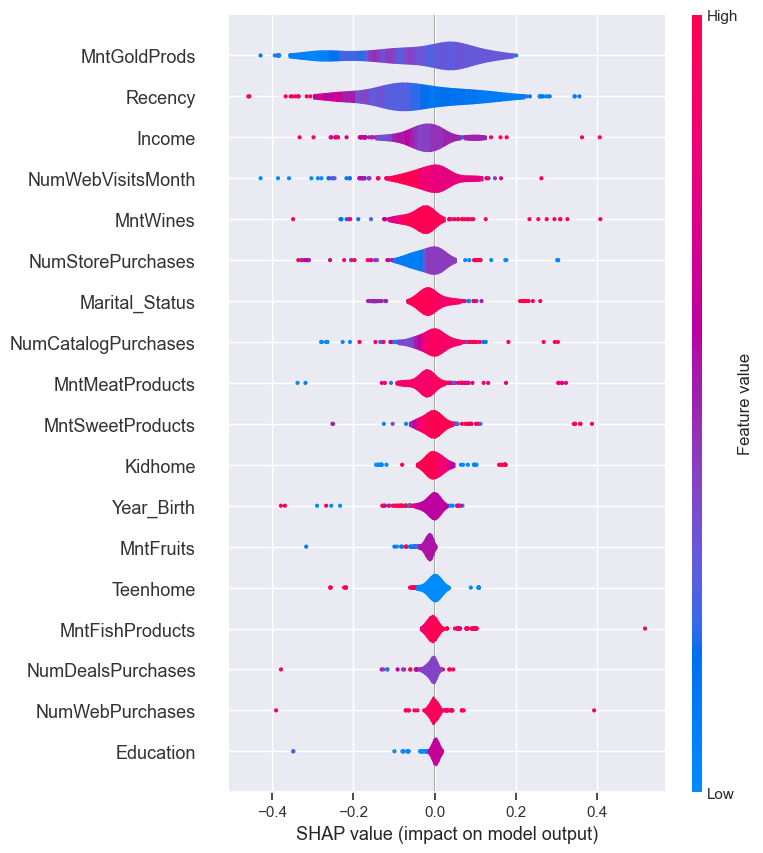

In [34]:
# compute SHAP values
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns, plot_type="violin")

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.7725225225225225')

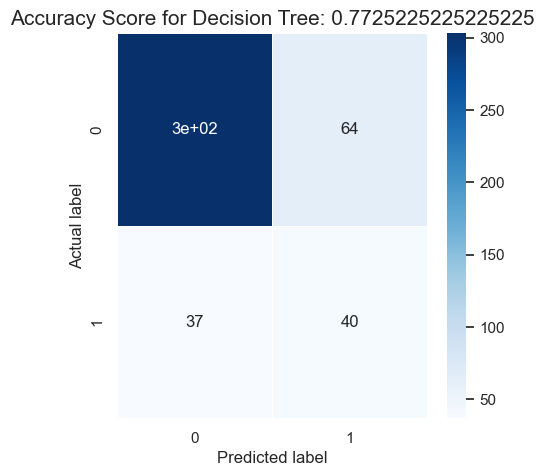

In [35]:
#getting and plotting the confusion matrix graph
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

A confusion matrix is a performance measurement tool commonly used in machine learning and statistics to assess the accuracy of a classification model. It provides a tabular representation of predicted and actual class labels, allowing us to understand the performance of the model in terms of true positives, true negatives, false positives, and false negatives.

Here is an example of a confusion matrix:

```
                 Predicted Negative   Predicted Positive
Actual Negative        TN                      FP
Actual Positive        FN                      TP
```

In the above matrix, the predicted labels are represented in columns, while the actual labels are represented in rows. The four key components of the confusion matrix are:

- True Negative (TN): The number of observations that were correctly predicted as negative.
- True Positive (TP): The number of observations that were correctly predicted as positive.
- False Negative (FN): The number of observations that were incorrectly predicted as negative when they were actually positive.
- False Positive (FP): The number of observations that were incorrectly predicted as positive when they were actually negative.

A confusion matrix provides a comprehensive overview of the model's performance by showing the distribution of predicted and actual labels. From this matrix, various performance metrics can be derived, including accuracy, precision, recall, and F1 score.

Regarding a confusion matrix graph, it is not a standard representation, but it is possible to visualize a confusion matrix using a heat map or a bar chart. In a heat map, the different cells of the confusion matrix are color-coded to indicate the frequency or percentage of observations falling into each category. This visualization technique helps to quickly identify patterns and areas where the model may be misclassifying certain classes.

A bar chart representation of a confusion matrix can be created by plotting the true positive, true negative, false positive, and false negative values on the y-axis and the corresponding class labels on the x-axis. The heights of the bars represent the frequency or percentage of observations falling into each category.

Both the tabular representation and graphical visualizations of a confusion matrix aid in understanding the model's performance and identifying areas for improvement.

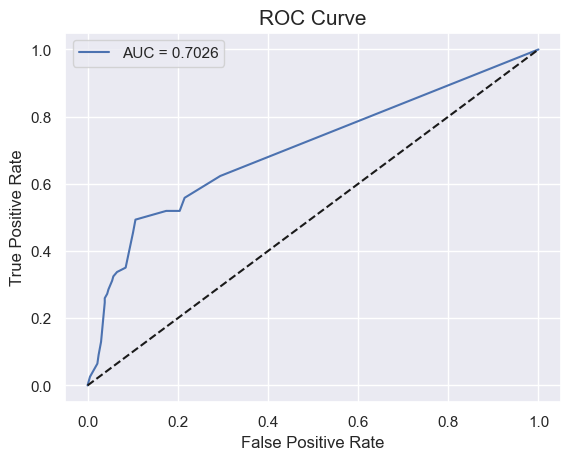

In [36]:
#getting the auc  and plotting the roc curve
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

The ROC curve (Receiver Operating Characteristic curve) and ROC AUC (Area Under the ROC Curve) score are evaluation metrics commonly used in binary classification tasks to assess the performance of a predictive model.

The ROC curve is created by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at various classification thresholds. The TPR, also known as sensitivity or recall, represents the proportion of actual positive samples correctly classified as positive. The FPR represents the proportion of actual negative samples incorrectly classified as positive. By varying the classification threshold, we can observe how the model's performance changes at different levels of sensitivity and specificity.

The ROC curve provides a graphical representation of the trade-off between the true positive rate and false positive rate. A model with perfect classification performance would have an ROC curve that passes through the upper-left corner of the plot, indicating a high true positive rate and a low false positive rate. Random guessing would result in an ROC curve that closely follows the diagonal line (with an AUC score of 0.5), indicating equal chances of true positives and false positives.

The ROC AUC score, on the other hand, quantifies the performance of a model by calculating the area under the ROC curve. The AUC score ranges from 0 to 1, with a higher value indicating better discrimination power of the model. An AUC score of 1 represents a perfect classifier, while an AUC score of 0.5 suggests a model that performs no better than random guessing.

In summary, the ROC curve and ROC AUC score provide a comprehensive evaluation of a binary classifier's performance, illustrating the model's ability to distinguish between positive and negative samples across various classification thresholds.

To interpret the ROC curve, you can consider the following points:

1. Steepness of the Curve: The steeper the ROC curve, the better the model's performance. A steep curve indicates that the model has a higher true positive rate while keeping the false positive rate low.

2. Area Under the Curve (AUC): The AUC score quantifies the overall performance of the model. An AUC score of 1 represents a perfect classifier, while an AUC score of 0.5 suggests a model that performs no better than random guessing. Higher AUC values indicate better classification performance.

3. Distance from the Random Guessing Line: The ROC curve should be significantly above the diagonal line that represents random guessing. The larger the distance, the better the model's ability to discriminate between positive and negative samples.

4. Optimal Operating Point: The optimal operating point on the ROC curve depends on the specific requirements of your problem. You can choose a threshold that balances the trade-off between true positive rate and false positive rate based on the desired sensitivity and specificity levels.

Overall, a good interpretation of the ROC curve involves assessing the shape, steepness, and overall positioning of the curve, as well as considering the AUC score. It provides insights into the model's ability to differentiate between positive and negative samples and helps you choose an appropriate threshold for classification based on the desired balance between true positives and false positives.

### RandomForest

In [37]:
#hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 42}


In [38]:
#modeling
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators=200, class_weight='balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [39]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 85.59 %


In [40]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.8558558558558559
Precision Score :  0.8558558558558559
Recall Score :  0.8558558558558559
Jaccard Score :  0.7480314960629921
Log Loss :  5.195481569602473


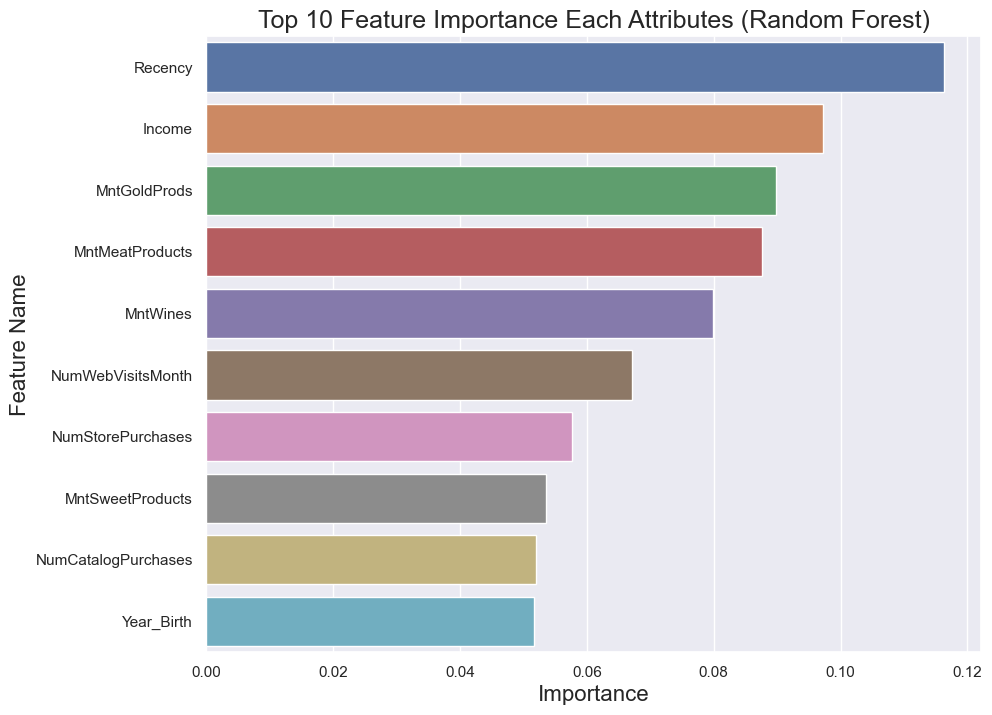

In [41]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

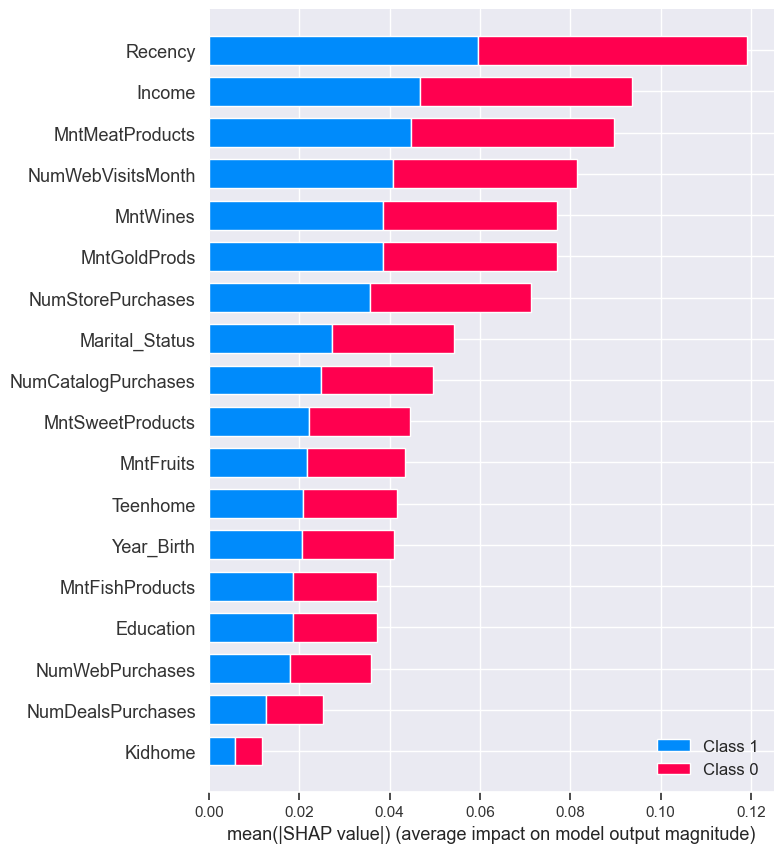

In [42]:
import shap
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

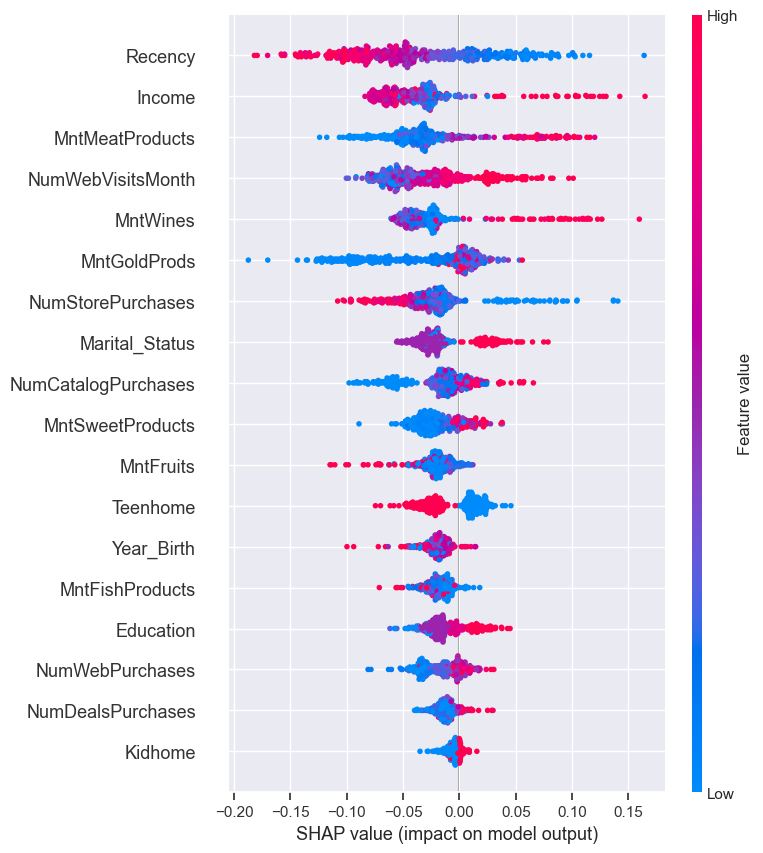

In [44]:
# compute SHAP values
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)

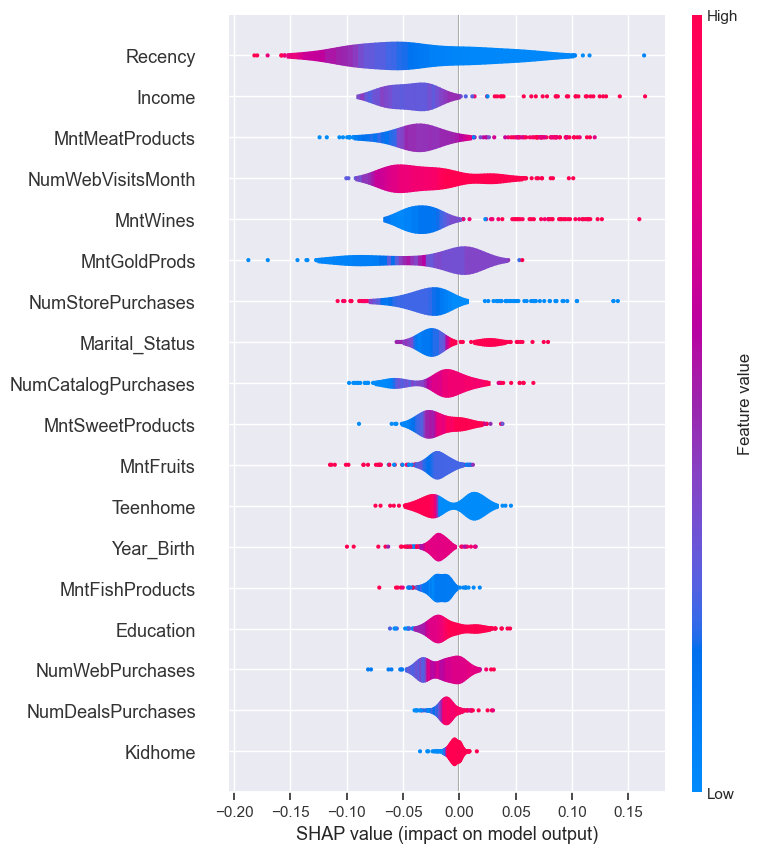

In [45]:
# compute SHAP values
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns, plot_type="violin")

Text(0.5, 1.0, 'Accuracy Score for Random Forest: 0.8558558558558559')

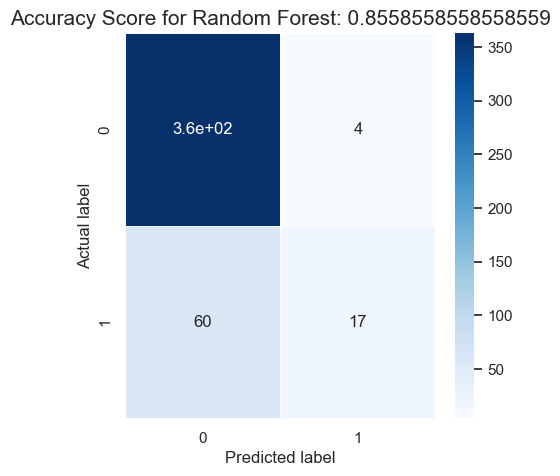

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

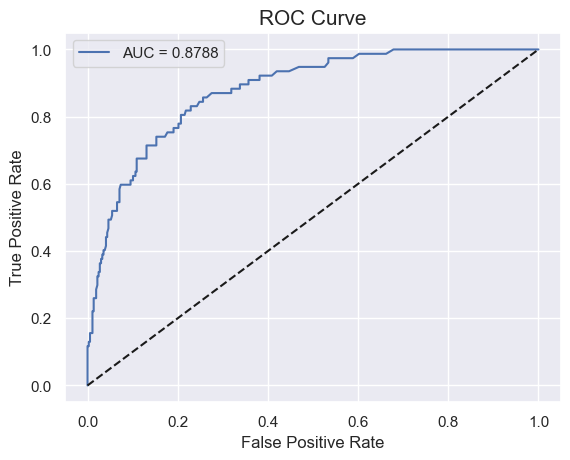

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

In [48]:
#open a file to store your data
import pickle
file=open('Super_store_Campaign_prediction.pkl','wb')
#dump information to the file
pickle.dump(rfc, file)